In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis whole data set

In [2]:
df = pd.read_csv("Merged_Preprocessed_Mars2020_2021.csv")

**Show all columns**

In [3]:
df.columns

Index(['Coder', 'Asset_Name', 'Brand', 'Lead_Country', 'Year_Produced',
       'Year_Aired', 'Segment', 'Agency', 'Character_Name',
       'Character_Description', 'Q1_Prominence', 'Q2_Age',
       'Q2a_Age_SpecifyOther', 'Q3_Sex', 'Q4_Gender', 'Q5_LGBTQ',
       'Q6_Animated', 'Q6a_Animated_OtherSpecify', 'Q7_Race_Ethnicity',
       'Q7a_RE_OtherSpecify', 'Q8_Disability', 'Q9a_Shopping', 'Q9b_Driving',
       'Q9c_Cleaning', 'Q9d_Cooking', 'Q9e_Working', 'Q9f_Socializing',
       'Q9g_Nothing', 'Q9h_Eating/Drinking', 'Q9i_Exercising',
       'Q9j_Activity Other', 'Q9j_Activity_Other_Specify', 'Q10a_Kitchen',
       'Q10b_Office', 'Q10c_Car', 'Q10d_Store', 'Q10e_Outdoors',
       'Q10f_Living Room', 'Q10g_Restaurant_Bar', 'Q10h_Gym', 'Q10i_Bedroom',
       'Q10j_Bathroom', 'Q10k_Sporting_Event', 'Q10l_Classroom',
       'Q10m_Location_Other', 'Q10m_Location_Other_Specify',
       'Q11_Revealing_Clothing', 'Q12_Nudity', 'Q12a_Nudity_Other_Specify',
       'Q13_Visually_Objectified', 'Q1

**Seperate to four dataframe of different columns**

In [4]:
segment_col = df[['Segment']]

age_col = df[['Q2_Age','Segment']]

sex_col = df[['Q3_Sex','Segment']]

gender_col = df[['Q4_Gender','Segment']]

**category feature nunique distribution**

In [5]:
# classify feature
cat_fea =['Segment','Q2_Age','Q3_Sex','Q4_Gender']
# category feature nunique distribution
for fea in cat_fea:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df[fea].nunique()))
    print(df[fea].value_counts())

*****************************
Segment's feature distribution as follow'：
Segment feature has 4 different values
Confectionary    729
Petcare          346
Wrigley          119
Food              93
Name: Segment, dtype: int64
*****************************
Q2_Age's feature distribution as follow'：
Q2_Age feature has 11 different values
4     428
5     283
6     152
3     115
7      68
1      56
10     50
8      43
11     36
9      31
2      25
Name: Q2_Age, dtype: int64
*****************************
Q3_Sex's feature distribution as follow'：
Q3_Sex feature has 3 different values
2    760
1    524
9      3
Name: Q3_Sex, dtype: int64
*****************************
Q4_Gender's feature distribution as follow'：
Q4_Gender feature has 5 different values
10    512
2     450
4     318
1       5
9       2
Name: Q4_Gender, dtype: int64


****
**Plot a boxplot and linegraph of numeric data and check/detect for outliers**

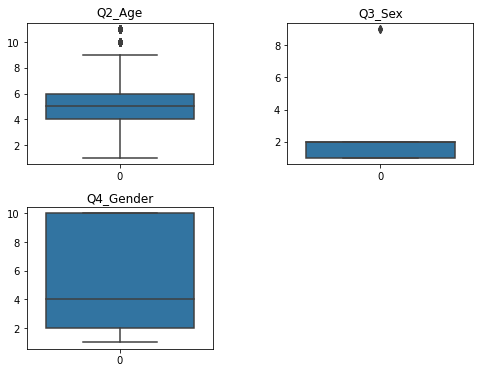

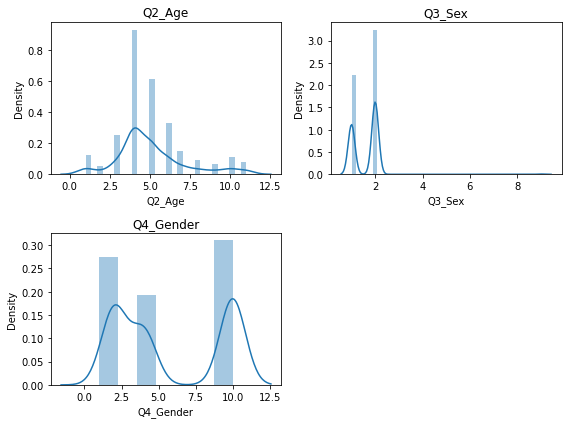

In [6]:
fig=plt.figure(figsize=(8,6))
i=1
num_fea =['Q2_Age','Q3_Sex','Q4_Gender']
for col in num_fea:
    ax=fig.add_subplot(2,2,i)
    sns.boxplot(data=df[col],ax=ax)
    i=i+1
    plt.title(col) 

plt.subplots_adjust(wspace=0.4,hspace=0.3)
plt.show()

fig=plt.figure(figsize=(8,6))
i=1
for col in num_fea:
    ax=fig.add_subplot(2,2,i)
    sns.distplot(df[col])
    i=i+1
    plt.title(col) 

plt.tight_layout()

****
**Plot histogram of Segment, Age, Sex, Gender**

<Figure size 432x288 with 0 Axes>

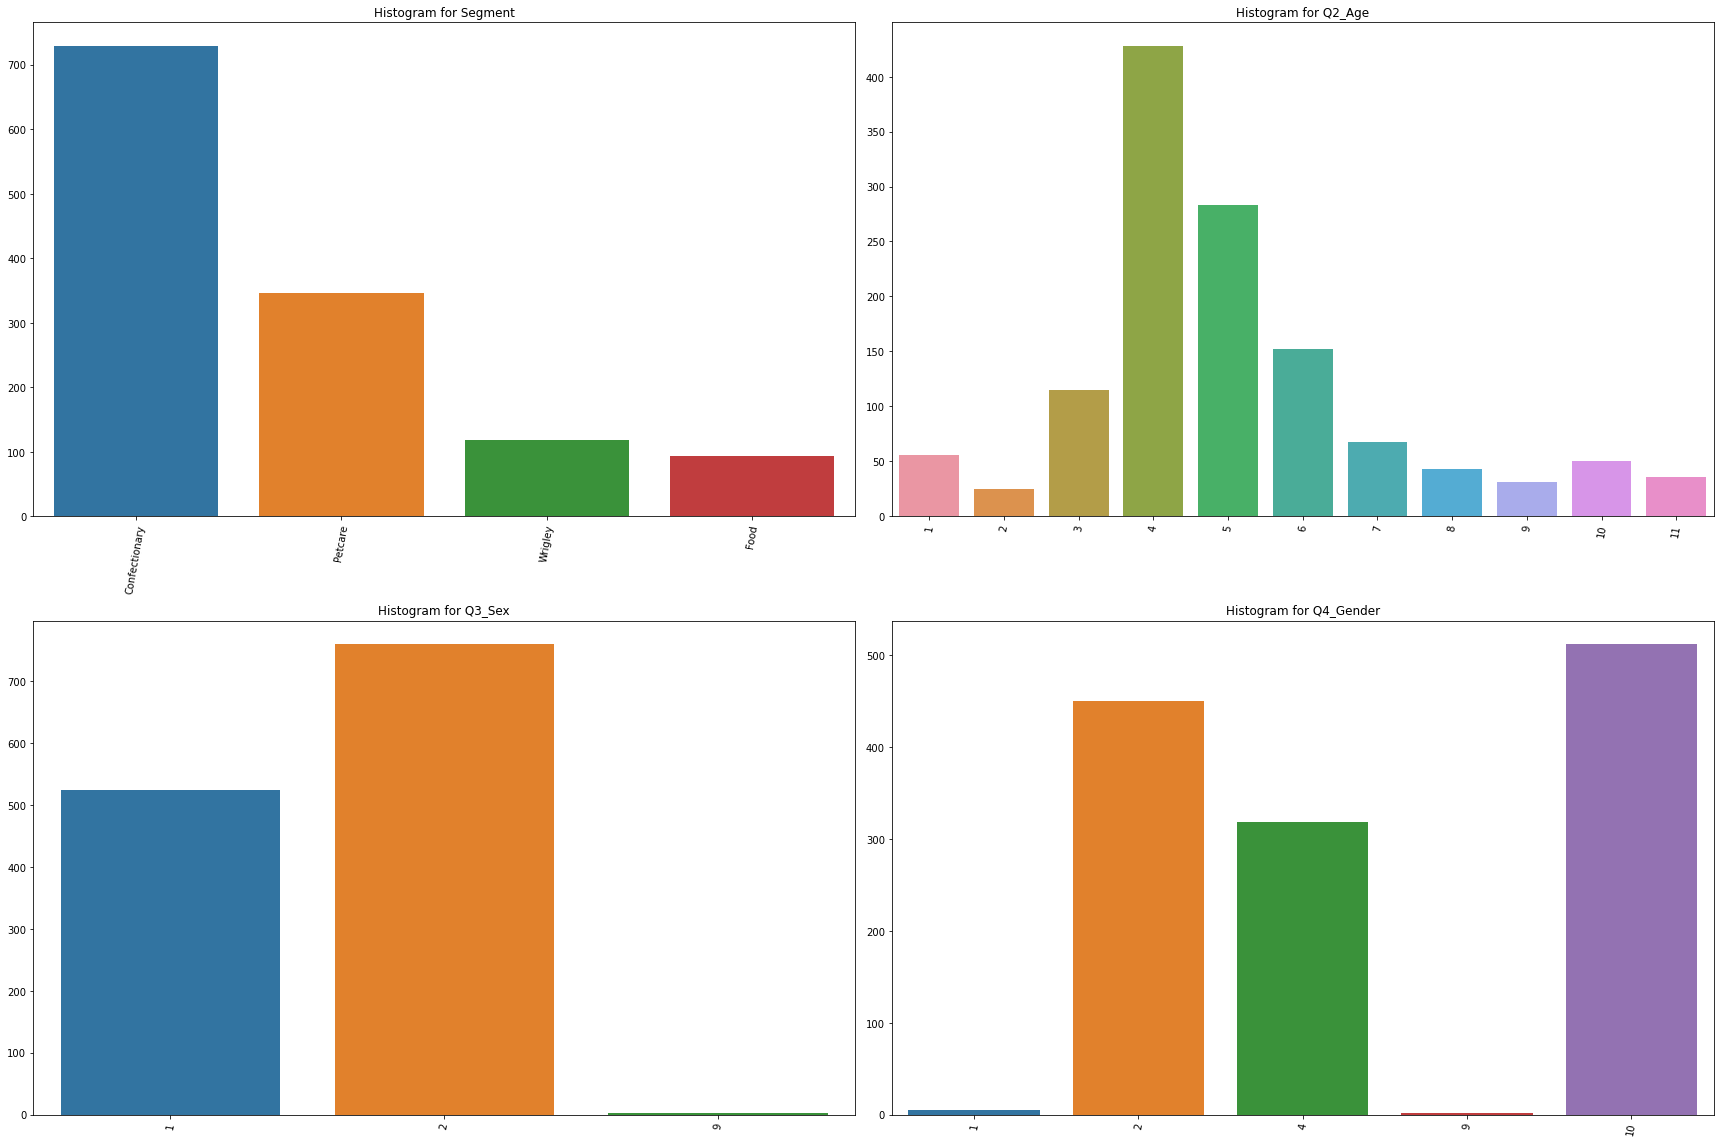

In [7]:
# plot histogram to show 10 most 
plt.figure()
plt.figure(figsize=(24, 24))
i = 1
for fea in cat_fea:
        plt.subplot(3, 2, i)
        
        i += 1
        v = df[fea].value_counts().nlargest(15)
        fig = sns.barplot(x=v.index, y=v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('Histogram for '+fea)
plt.tight_layout()
plt.show()

### Observation for entire dataset
**For Segment column, we can see the 'confectionary' accounts for half of the total data volume of Segment column**

**For Q2_Age column, most value are 4, which is the age of 20-29 year olds**

**For Q3_Sex column, number of male is more than female, and there is a little people don't tell their sex**

**For Q4_Gender column, we find that value 'Not Applicable' is the largest, and then is the 'Masculine' and 'Feminine'. Also, there are a few 'Hyper-Masciline' and 'Can't Tell'**

******
******
### Question :
### Are there industry differences in representation in advertisements?
### “industry” refers to the “Segment” column, and “representation” refers to all the question columns. 

In [8]:
industry = segment_col

In [9]:
industry.describe()

,Segment
count,1287
unique,4
top,Confectionary
freq,729


### Specific examples of how to interpret the questions could be: Are there segment differences in different ages?

### Industry differences of the Q2_Age column

In [10]:
age_col.head()

,Q2_Age,Segment
0,5,Confectionary
1,4,Confectionary
2,8,Confectionary
3,2,Confectionary
4,2,Confectionary


In [11]:
for i in range(1,12):
    df_age = age_col.loc[age_col['Q2_Age'] == i]
    print('Q2_Age =',i)
    print(df_age['Segment'].value_counts())
    print()

Q2_Age = 1
Petcare          25
Food             18
Confectionary    13
Name: Segment, dtype: int64

Q2_Age = 2
Confectionary    14
Petcare           7
Food              4
Name: Segment, dtype: int64

Q2_Age = 3
Confectionary    75
Wrigley          24
Petcare          12
Food              4
Name: Segment, dtype: int64

Q2_Age = 4
Confectionary    246
Petcare           91
Wrigley           60
Food              31
Name: Segment, dtype: int64

Q2_Age = 5
Confectionary    134
Petcare          106
Wrigley           23
Food              20
Name: Segment, dtype: int64

Q2_Age = 6
Confectionary    85
Petcare          52
Food             11
Wrigley           4
Name: Segment, dtype: int64

Q2_Age = 7
Confectionary    38
Petcare          24
Wrigley           5
Food              1
Name: Segment, dtype: int64

Q2_Age = 8
Petcare          22
Confectionary    17
Food              2
Wrigley           2
Name: Segment, dtype: int64

Q2_Age = 9
Confectionary    28
Food              1
Petcare           1
W

### Observation for Q2_Age:

**We can find that among the Q2_Age=1, the Petcare is the most**

**With the increasing of the age, more people are in the "Confectionary" industry, but when Q2_Age = 8 the Petcare is greater than Confectionary**

**And by the statistics, we observe that the largest amount of data are in the "Confectionary" industry**

**And someone don't tell or are unwilling to disclose the information of age**

### Industry differences of the Q3_Sex column

In [12]:
sex_list = [1,2,9]
for i in sex_list:
    df_sex = sex_col.loc[sex_col['Q3_Sex'] == i]
    print('Q3_Sex =',i)
    print(df_sex['Segment'].value_counts())
    print()

Q3_Sex = 1
Confectionary    262
Petcare          157
Wrigley           59
Food              46
Name: Segment, dtype: int64

Q3_Sex = 2
Confectionary    467
Petcare          186
Wrigley           60
Food              47
Name: Segment, dtype: int64

Q3_Sex = 9
Petcare    3
Name: Segment, dtype: int64



### Observation for Q3_Sex:

**We can find that among the Q3_Sex = 1 which is "Female", the "Confectionary" is the most, "Food" is the smallest**

**We can find that among the Q3_Sex = 2 which is "Male", the "Confectionary" is the most, "Food" is the smallest**

**We can find that among the Q3_Sex = 9 which is "Can't tell", there is only Petcare**

**And by the statistics, we observe that the largest amount of data are in the "Confectionary" industry**

**And some of people can not tell their sex**

### Industry differences of the Q4_Gender column

In [13]:
gender_list = [1,2,4,9,10,]
for i in gender_list:
    df_gender = gender_col.loc[gender_col['Q4_Gender'] == i]
    print('Q4_Gender =',i)
    print(df_gender['Segment'].value_counts())
    print()

Q4_Gender = 1
Petcare    3
Wrigley    2
Name: Segment, dtype: int64

Q4_Gender = 2
Confectionary    313
Wrigley           58
Petcare           55
Food              24
Name: Segment, dtype: int64

Q4_Gender = 4
Confectionary    151
Petcare           82
Wrigley           59
Food              26
Name: Segment, dtype: int64

Q4_Gender = 9
Confectionary    1
Petcare          1
Name: Segment, dtype: int64

Q4_Gender = 10
Confectionary    264
Petcare          205
Food              43
Name: Segment, dtype: int64



### Observation for Q4_Gender:

**We can find that among the Q4_Gender = 1 which is "Hyper-Masculine", is in either Petcare or Wrigley**

**We can find that among the Q4_Gender = 2 which is "Masculine", the "Confectionary" is much higher than other industries, each industry has "Masculine"**

**We can find that among the Q4_Gender = 4 which is "Feminine", the "Confectionary" is also higher than other industries, each industry has "Feminine"**

**And by the statistics, we observe that the largest amount of data whatever their gender are in the "Confectionary" industry**

**And many of people are "Not Applicable" of Q4_gender in "Confectionary", "Petcare" and "Food"**

****
****

### Try different way to answer the question, separate four different segments to different dataframes

### **Create confectionary dataframe**

In [14]:
df_confectionary = df.loc[df['Segment'] == 'Confectionary']
df_confectionary = df_confectionary.loc[:,['Q2_Age','Q3_Sex', 'Q4_Gender']]
df_confectionary.reset_index(inplace = True)
df_confectionary.drop('index', axis = 1, inplace = True)
df_confectionary.head()

,Q2_Age,Q3_Sex,Q4_Gender
0,5,2,10
1,4,2,10
2,8,2,10
3,2,2,10
4,2,1,10


### category feature nunique distribution

In [15]:

cat_fea_confectionary =['Q2_Age','Q3_Sex','Q4_Gender']
# category feature nunique distribution
for fea in cat_fea_confectionary:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_confectionary[fea].nunique()))
    print(df_confectionary[fea].value_counts())

*****************************
Q2_Age's feature distribution as follow'：
Q2_Age feature has 11 different values
4     246
5     134
6      85
3      75
10     48
7      38
11     31
9      28
8      17
2      14
1      13
Name: Q2_Age, dtype: int64
*****************************
Q3_Sex's feature distribution as follow'：
Q3_Sex feature has 2 different values
2    467
1    262
Name: Q3_Sex, dtype: int64
*****************************
Q4_Gender's feature distribution as follow'：
Q4_Gender feature has 4 different values
2     313
10    264
4     151
9       1
Name: Q4_Gender, dtype: int64


### Plot Histogram for columns

<Figure size 432x288 with 0 Axes>

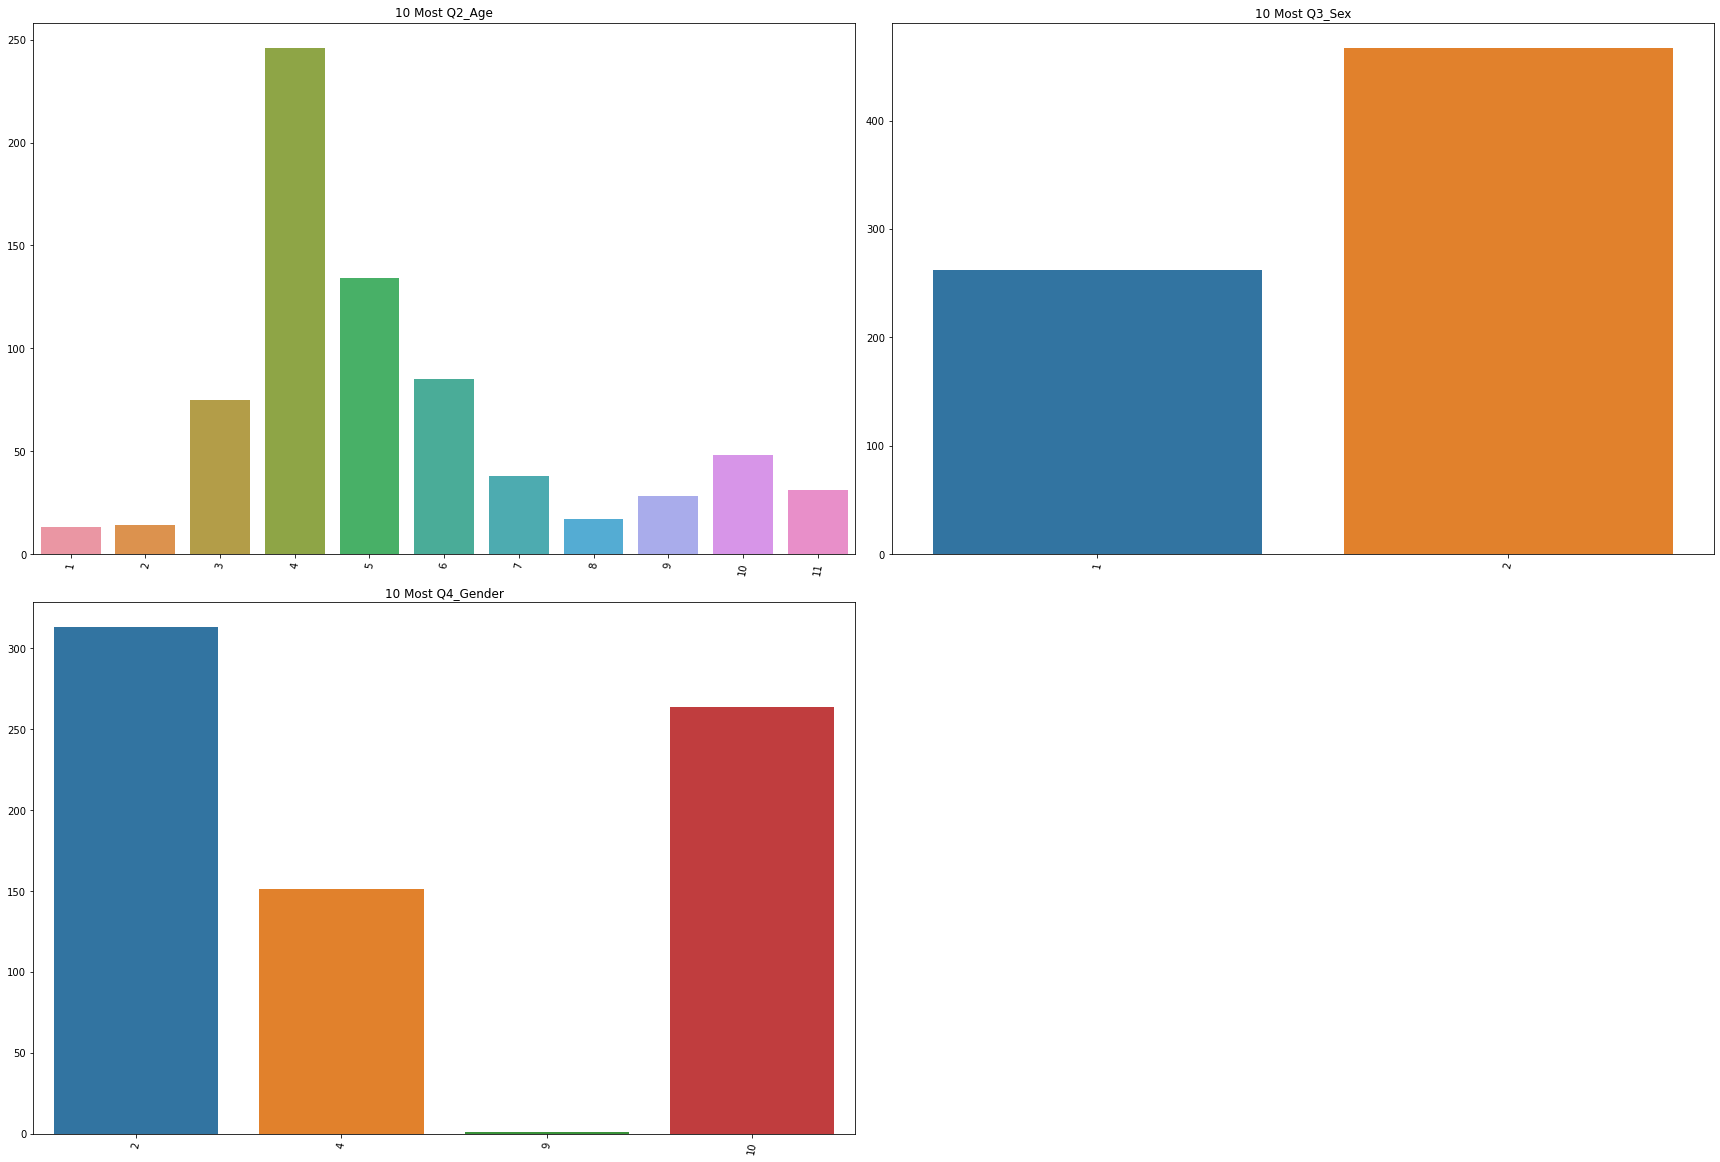

In [16]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 24))
i = 1
for fea in cat_fea_confectionary:
        plt.subplot(3, 2, i)
        i += 1
        v = df_confectionary[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Confectionary, the 20-29 age group(4) has the largest proportion, the second one is group(5)**

**Through Q3_Sex and Q4_Gender, we can find that the number of male is definitely greater than female and lots of people choose "Not Applicable" on Q4_gender**

### Barplot for sex portions of confectionary

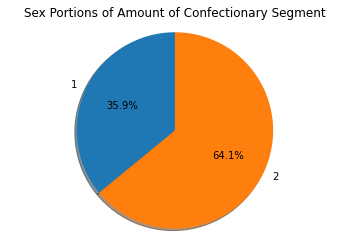

In [17]:
Sex1 = df_confectionary[df_confectionary['Q3_Sex'] == 1]['Q3_Sex'].value_counts()
Sex2 = df_confectionary[df_confectionary['Q3_Sex'] == 2]['Q3_Sex'].value_counts()

labels = '1','2'
sizes = [Sex1.values.item(), Sex2.values.item()]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Portions of Amount of Confectionary Segment')
plt.show()

**We can find that for Confectionary segment, the amount of "Male(2)" is 64.1%, which is more than "Female(1)" (35.9%)**

**From the four barplot for sex portions of different industry, we can conclude that the Confectionary has the largest difference in the number of male and female**

### Compute Mean and std of Q2_Age for Confectionary

In [18]:
age_mean_confectionary = df_confectionary['Q2_Age'].mean()
age_mean_confectionary = round(age_mean_confectionary, 2)
age_std_confectionary = df_confectionary['Q2_Age'].std()
age_std_confectionary = round(age_std_confectionary, 2)
print('Mean of Age is', age_mean_confectionary, 'Standard deviation of Age is',age_std_confectionary)

Mean of Age is 5.36 Standard deviation of Age is 2.33


**we can get the average value of Q2_Age for the Confectionary industry is 5.36(around 34 years old),the std value is 2.33**
*****

### **Create Petcare dataframe**

In [19]:
df_petcare = df.loc[df['Segment'] == 'Petcare']
df_petcare = df_petcare.loc[:,['Q2_Age','Q3_Sex', 'Q4_Gender']]
df_petcare.reset_index(inplace = True)
df_petcare.drop('index',axis = 1, inplace = True)
# df_petcare.head()

In [20]:
# category feature nunique distribution
cat_fea_petcare =['Q2_Age','Q3_Sex','Q4_Gender']
# category feature nunique distribution
for fea in cat_fea_petcare:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_petcare[fea].nunique()))
    print(df_petcare[fea].value_counts())

*****************************
Q2_Age's feature distribution as follow'：
Q2_Age feature has 11 different values
5     106
4      91
6      52
1      25
7      24
8      22
3      12
2       7
11      4
10      2
9       1
Name: Q2_Age, dtype: int64
*****************************
Q3_Sex's feature distribution as follow'：
Q3_Sex feature has 3 different values
2    186
1    157
9      3
Name: Q3_Sex, dtype: int64
*****************************
Q4_Gender's feature distribution as follow'：
Q4_Gender feature has 5 different values
10    205
4      82
2      55
1       3
9       1
Name: Q4_Gender, dtype: int64


### Plot Histogram for columns

<Figure size 432x288 with 0 Axes>

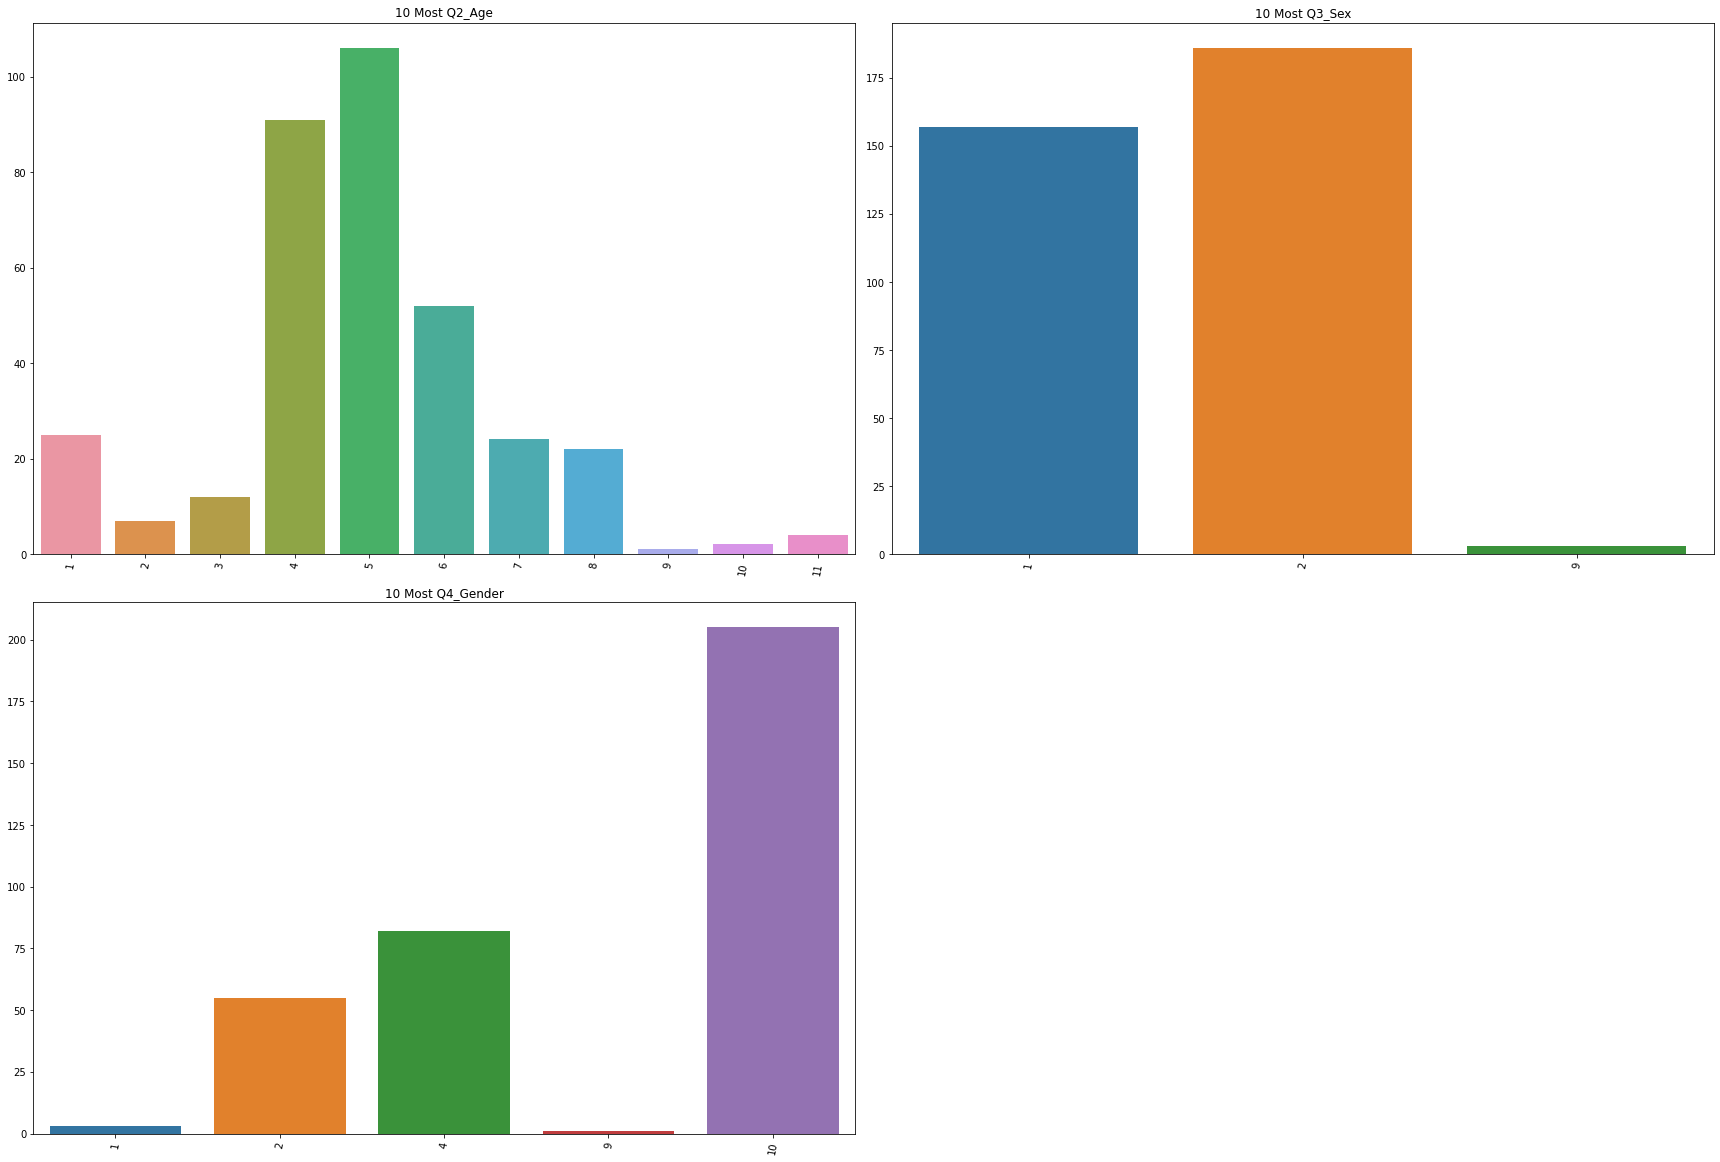

In [21]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 24))
i = 1
for fea in cat_fea_petcare:
        plt.subplot(3, 2, i)
        i += 1
        v = df_petcare[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Petcare, the 30s age group(5) has the largest proportion, the second one is group(4)**

### Barplot

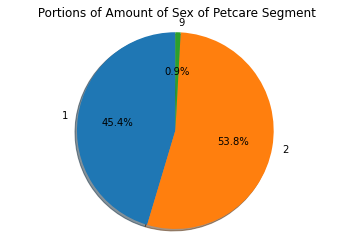

In [22]:
Sex1_petcare = df_petcare[df_petcare['Q3_Sex'] == 1]['Q3_Sex'].value_counts()
Sex2_petcare = df_petcare[df_petcare['Q3_Sex'] == 2]['Q3_Sex'].value_counts()
Sex9_petcare = df_petcare[df_petcare['Q3_Sex'] == 9]['Q3_Sex'].value_counts()

labels_petcare = '1','2','9'
sizes_petcare = [Sex1_petcare.values.item(), Sex2_petcare.values.item(), Sex9_petcare.values.item()]
explode_petcare = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_petcare, explode = explode_petcare, labels = labels_petcare, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Petcare Segment')
plt.show()

**We can find that for Petcare, the amount of "Male(2)" is 53.8% which is the largest one, the amount of "Female(1)" is 45.4% and the amount of "Can't tell(9)" is 0.9%**

### Compute Mean and std of Q3_Age for Petcare

In [23]:
age_mean_petcare = df_petcare['Q2_Age'].mean()
age_mean_petcare = round(age_mean_petcare, 2)
age_std_petcare = df_petcare['Q2_Age'].std()
age_std_petcare = round(age_std_petcare, 2)
print('Mean of Age is', age_mean_petcare, 'Standard deviation of Age is',age_std_petcare)

Mean of Age is 4.91 Standard deviation of Age is 1.83


**we can get the average value of Q2_Age for the Petcare industry is 4.91(around 30 years old), which is smaller than Confectionary industry, the std value is 1.83**
*****

## **Create Wrigley dataframe**

In [24]:
df_wrigley = df.loc[df['Segment'] == 'Wrigley']
df_wrigley = df_wrigley.loc[:,['Q2_Age','Q3_Sex', 'Q4_Gender']]
df_wrigley.reset_index(inplace = True)
df_wrigley.drop('index' , axis = 1, inplace = True)
df_wrigley.head()

,Q2_Age,Q3_Sex,Q4_Gender
0,4,1,4
1,4,1,4
2,4,2,2
3,4,2,2
4,4,2,2


In [25]:
# category feature nunique distribution
cat_fea_wrigley =['Q2_Age','Q3_Sex','Q4_Gender']
# category feature nunique distribution
for fea in cat_fea_wrigley:
    print('*********************c********')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_wrigley[fea].nunique()))
    print(df_wrigley[fea].value_counts())

*********************c********
Q2_Age's feature distribution as follow'：
Q2_Age feature has 7 different values
4    60
3    24
5    23
7     5
6     4
8     2
9     1
Name: Q2_Age, dtype: int64
*********************c********
Q3_Sex's feature distribution as follow'：
Q3_Sex feature has 2 different values
2    60
1    59
Name: Q3_Sex, dtype: int64
*********************c********
Q4_Gender's feature distribution as follow'：
Q4_Gender feature has 3 different values
4    59
2    58
1     2
Name: Q4_Gender, dtype: int64


### Plot Histogram

<Figure size 432x288 with 0 Axes>

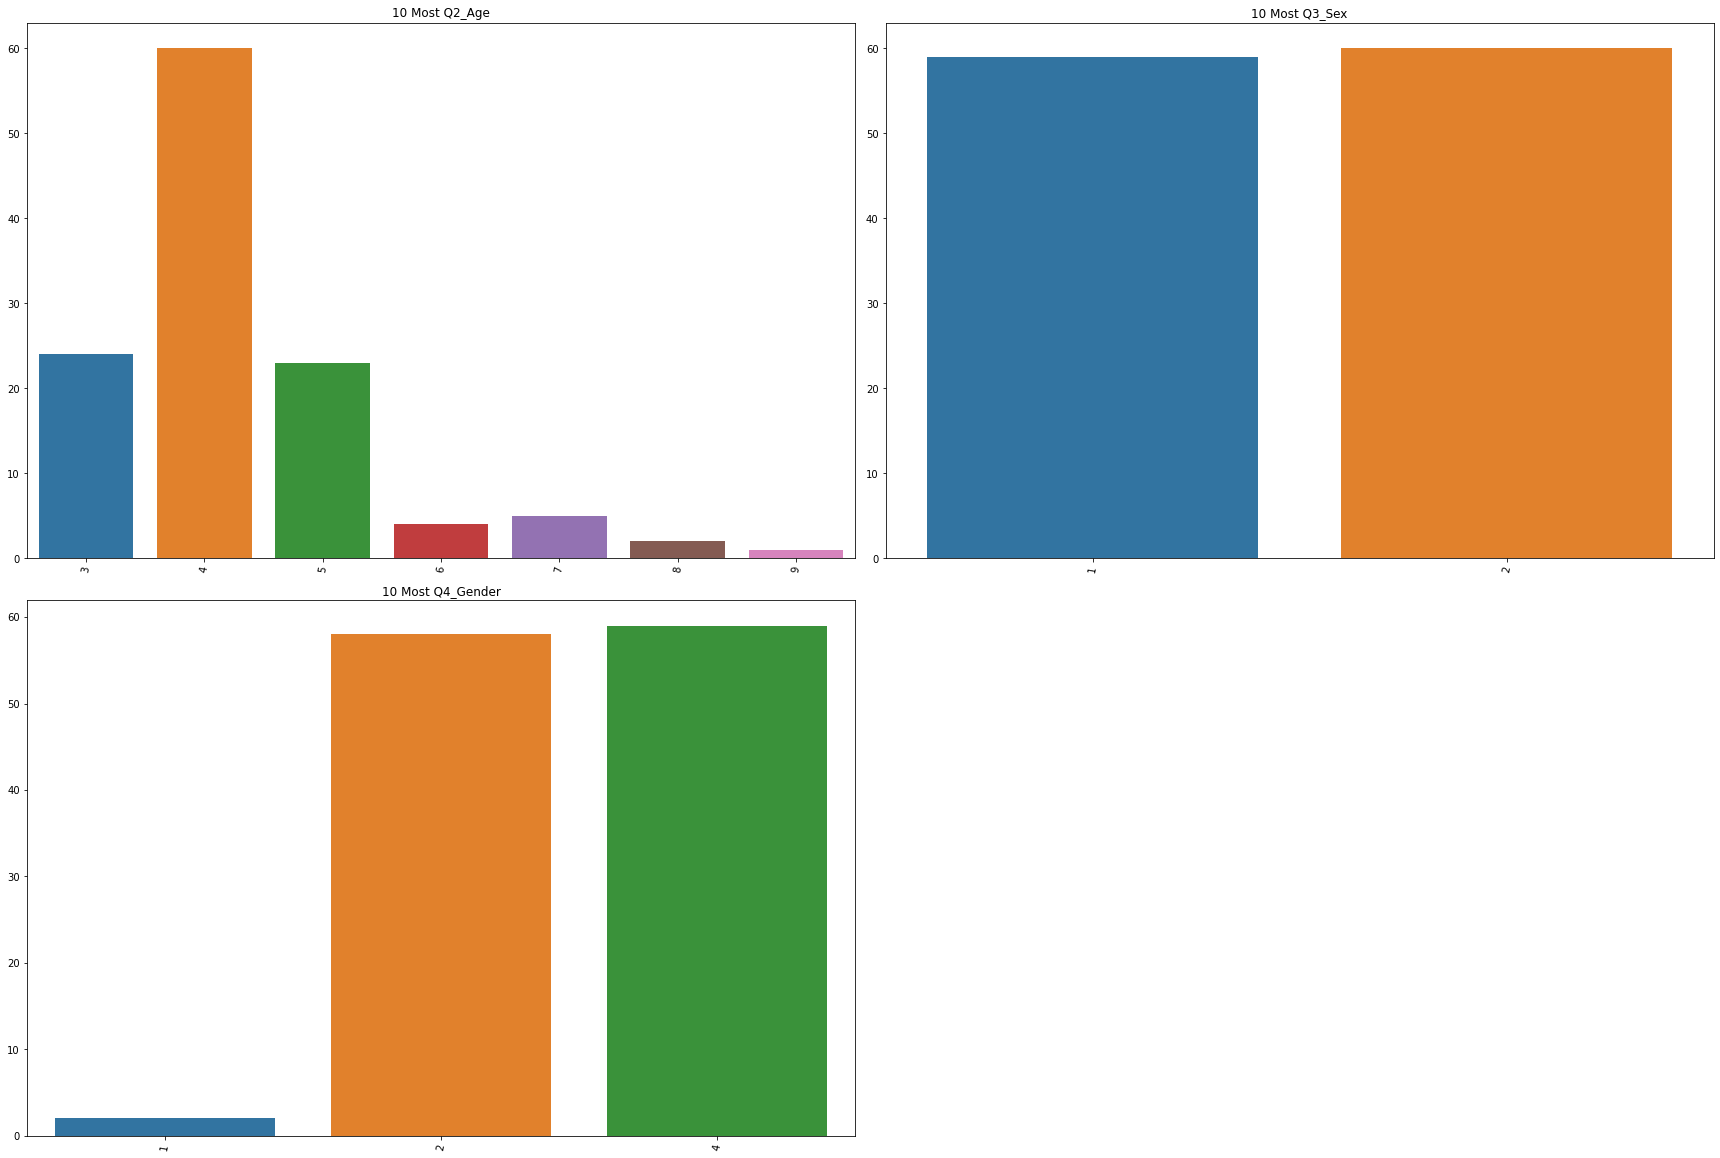

In [26]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 24))
i = 1
for fea in cat_fea_wrigley:
        plt.subplot(3, 2, i)
        i += 1
        v = df_wrigley[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Petcare, the 20s age group(4) has the largest proportion, the second one is group(3), but number of group(5) is close to group(3)**

**For the gender column of Wrigley, there are small portion of "Hyper-Masculine(1)", the number of "Masculine(4)" and "Feminine(2)" is close, which is same as sex column**

### BarPlot

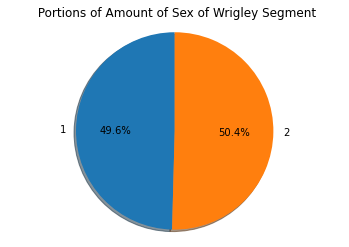

In [27]:
Sex1_wrigley = df_wrigley[df_wrigley['Q3_Sex'] == 1]['Q3_Sex'].value_counts()
Sex2_wrigley = df_wrigley[df_wrigley['Q3_Sex'] == 2]['Q3_Sex'].value_counts()

labels_wrigley = '1','2'
sizes_wrigley = [Sex1_wrigley.values.item(), Sex2_wrigley.values.item()]
explode_wrigley = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_wrigley, explode = explode_wrigley, labels = labels_wrigley, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Wrigley Segment')
plt.show()

**We can find that for Confectionary segment, the amount of male is 50.4% which is more than female 49.6%**

**The number of "males(2)" and "females(1)" is basically the same**

**From the four barplot for sex portions of different industry, we can conclude that the Wrigley has the smallest difference in the number of male and female**

### Compute Mean and std of Q3_Age for Petcare

In [28]:
age_mean_wrigley = df_wrigley['Q2_Age'].mean()
age_mean_wrigley = round(age_mean_wrigley, 2)
age_std_wrigley = df_wrigley['Q2_Age'].std()
age_std_wrigley = round(age_std_wrigley, 2)
print('Mean of Age is', age_mean_wrigley, 'Standard deviation of Age is',age_std_wrigley)

Mean of Age is 4.29 Standard deviation of Age is 1.15


**we can get the average value of Q2_Age for the Wrigley industry is 4.29(around 25 years old), which is smaller than Confectionary and Petcare and bigger than Food, the std value is 1.15, means the age distribution is relatively concentrated**
*****

## **Create Food dataframe**

In [29]:
df_food = df.loc[df['Segment'] == 'Food']
df_food = df_food.loc[:,['Q2_Age','Q3_Sex', 'Q4_Gender']]
df_food.reset_index(inplace = True)
df_food.drop('index', axis = 1, inplace = True)
df_food.head()

,Q2_Age,Q3_Sex,Q4_Gender
0,4,1,10
1,4,1,10
2,4,1,10
3,4,2,10
4,4,2,10


In [30]:
# category feature nunique distribution
cat_fea_food =['Q2_Age','Q3_Sex','Q4_Gender']
# category feature nunique distribution
for fea in cat_fea_food:
    print('*****************************')
    print(fea + "'s feature distribution as follow'：")
    print("{} feature has {} different values".format(fea,df_food[fea].nunique()))
    print(df_food[fea].value_counts())

*****************************
Q2_Age's feature distribution as follow'：
Q2_Age feature has 10 different values
4     31
5     20
1     18
6     11
3      4
2      4
8      2
9      1
7      1
11     1
Name: Q2_Age, dtype: int64
*****************************
Q3_Sex's feature distribution as follow'：
Q3_Sex feature has 2 different values
2    47
1    46
Name: Q3_Sex, dtype: int64
*****************************
Q4_Gender's feature distribution as follow'：
Q4_Gender feature has 3 different values
10    43
4     26
2     24
Name: Q4_Gender, dtype: int64


### Plot Histogram

<Figure size 432x288 with 0 Axes>

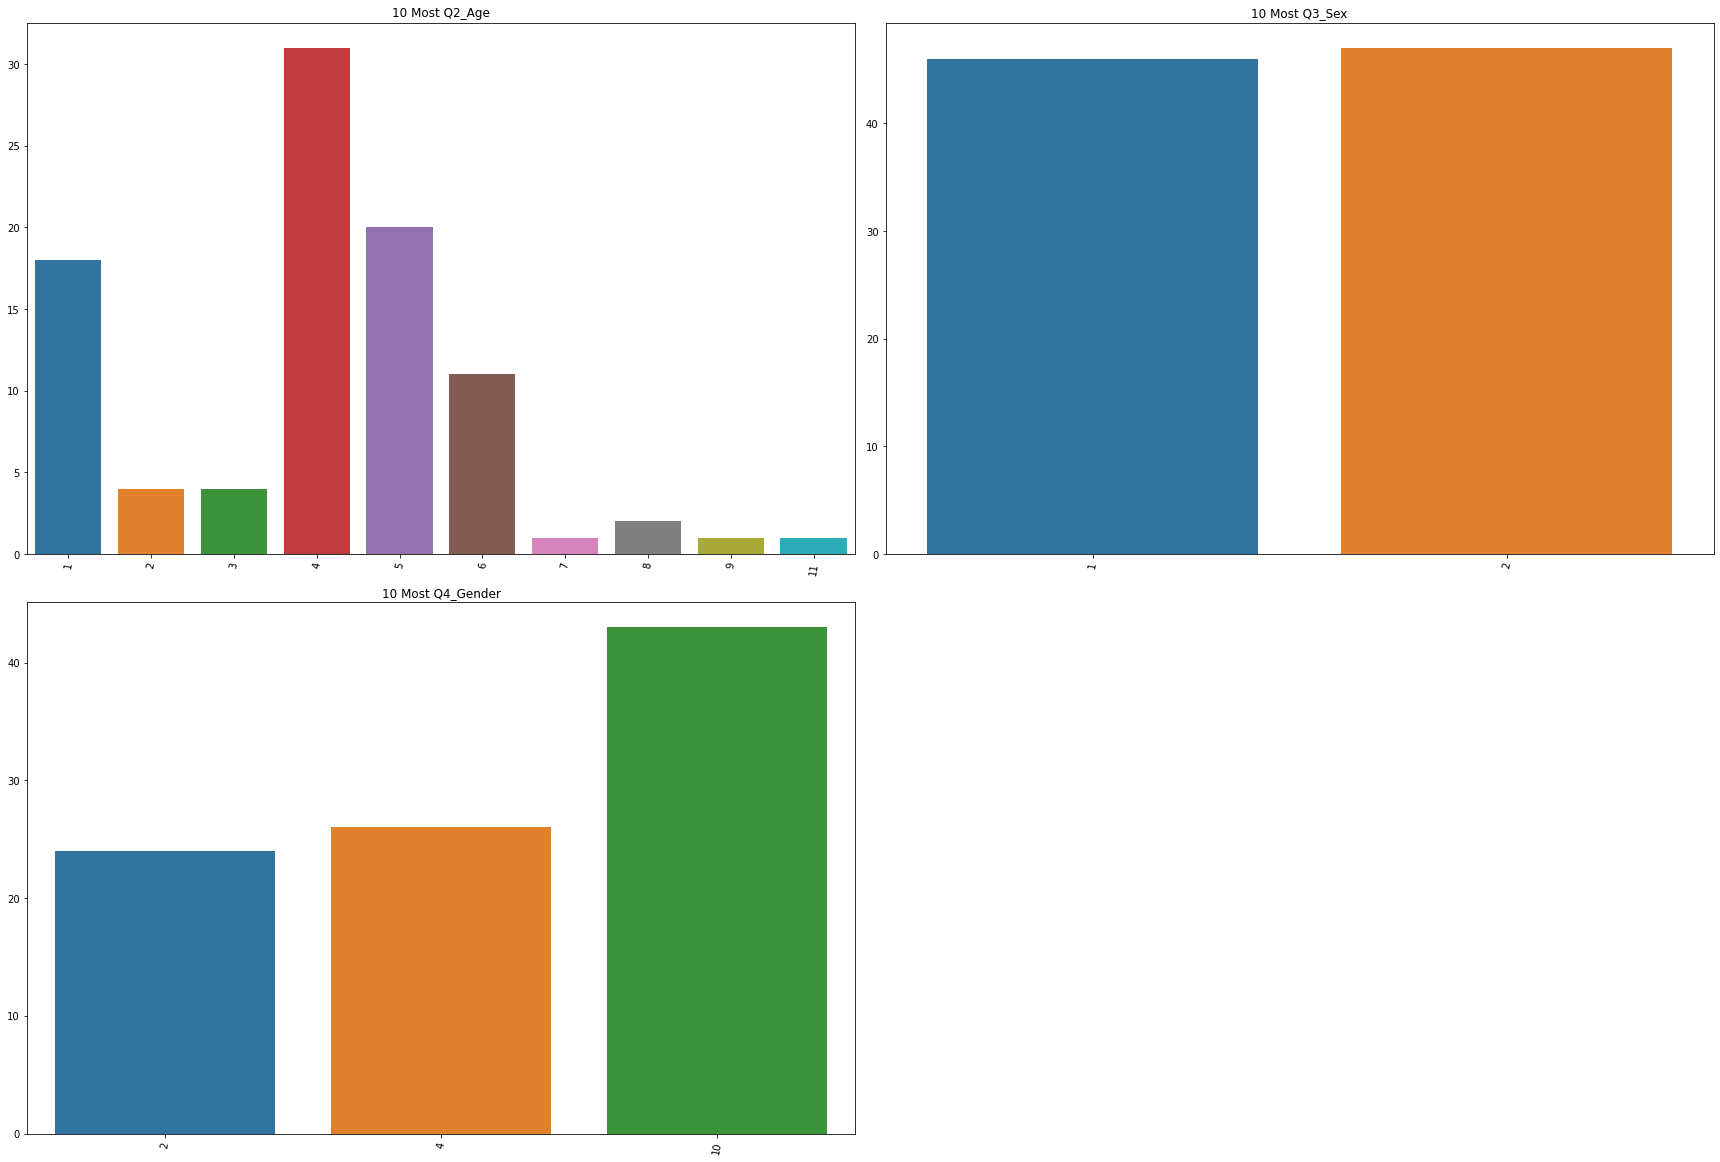

In [31]:
# plot histogram to show
plt.figure()
plt.figure(figsize=(24, 24))
i = 1
for fea in cat_fea_food:
        plt.subplot(3, 2, i)
        i += 1
        v = df_food[fea].value_counts().nlargest(15)
        fig = sns.barplot(x = v.index, y = v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(80)
        plt.title('10 Most '+fea)
plt.tight_layout()
plt.show()

**We can find that for Petcare, the 20s age group(4) has the largest proportion, the second one is group(5), and the number of group(1) is close to group(5)**

**For the gender column of Wrigley, there are large portion of "Not Applicable(10)", the number of "Masculine(4)" and "Feminine(2)" is close, which is same as sex column**

### Barplot

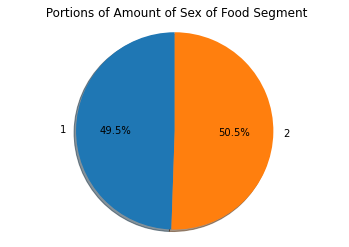

In [32]:
Sex1_food = df_food[df_food['Q3_Sex'] == 1]['Q3_Sex'].value_counts()
Sex2_food = df_food[df_food['Q3_Sex'] == 2]['Q3_Sex'].value_counts()

labels_food = '1','2'
sizes_food = [Sex1_food.values.item(), Sex2_food.values.item()]
explode_food = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes_food, explode = explode_food, labels = labels_food, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Sex of Food Segment')
plt.show()

**We can find that for Confectionary segment, the amount of "Male(2)" is 50.5% which is more than "Female(1)" 49.5%**

**The number of "Male(2)" and "Female(1)" is basically the same**

### Compute Mean and std of Q3_Age for Petcare

In [33]:
age_mean_food = df_food['Q2_Age'].mean()
age_mean_food = round(age_mean_food, 2)
age_std_food = df_food['Q2_Age'].std()
age_std_food = round(age_std_food, 2)
print('Mean of Age is', age_mean_food, 'Standard deviation of Age is',age_std_food)

Mean of Age is 3.99 Standard deviation of Age is 1.98


**we can get the average value of Q2_Age for the Food industry is 3.99(around 20 years old), which is smallest among these four industry, the std value is 1.98, means the age distribution is not relatively concentrated**

**We can conclude that the the average age of the Food is the youngest**